In [1]:
from scipy import *
from scipy import integrate
from scipy import optimize
import numpy as np
from pylab import *
import matplotlib.pyplot as plt

In [2]:
#shooting method for H atom
def Schroed_deriv(y,r,l,En):
    "Given y=[u,u'] returns dy/dr=[u',u''] "
    (u,up) = y
    return np.array([up, (l*(l+1)/r**2-2/r-En)*u])

In [3]:
R = np.linspace(1e-10, 10, 500)
l = 0
E0 = -1
Rb = R[::-1] #invert the linspace

urb = integrate.odeint(Schroed_deriv, [5, -1], Rb, args=(l, E0))
ur = urb[:,0][::-1] # invert u(r) in R

norm = integrate.simps(ur**2, x=R)
ur *= 1./np.sqrt(norm)

C:\Users\natha\AppData\Local\Temp\ipykernel_31476\1467117097.py:9: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  norm = integrate.simps(ur**2, x=R)


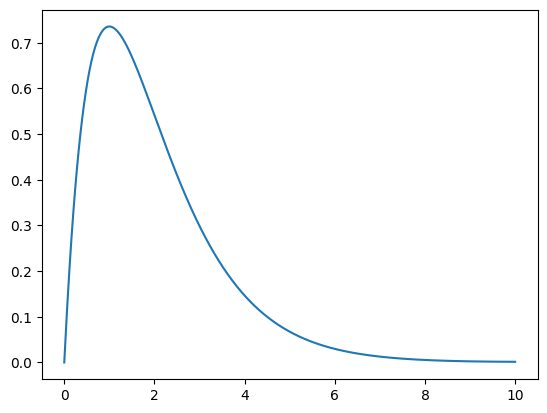

In [4]:
plt.plot(R, ur)

plt.show()


In [5]:
#combine previous code into a function
def SolveSchroedinger(En,l,R):
    Rb=R[::-1]
    du0=-1e-5
    urb=integrate.odeint(Schroed_deriv, [0.0,du0], Rb, args=(l,En))
    ur=urb[:,0][::-1]
    norm=integrate.simps(ur**2,x=R)
    ur *= 1./sqrt(norm)
    return ur

(0.0, 20.0)

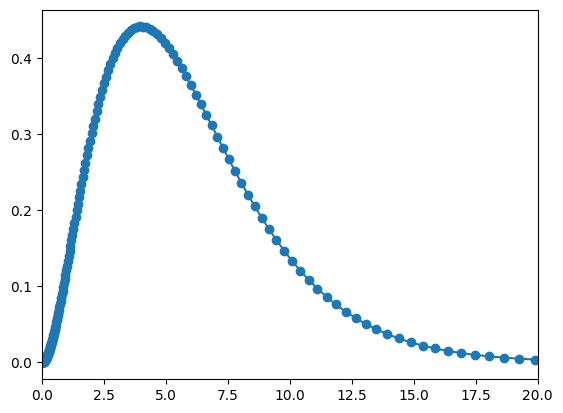

In [11]:
%matplotlib inline
R = np.logspace(-5, 2, 500)
ui = SolveSchroedinger(-1/4,1,R)
plt.plot(R,ui, 'o-')
xlim(0,20)

In [15]:
# create the shooting method
def shoot(En,R,l):
    #solve the Schroedinger equation
    Rb=R[::-1]
    du0=-1e-5
    ub=integrate.odeint(Schroed_deriv, [0.0,du0], Rb, args=(l,En))
    ur=ub[:,0][::-1]
    norm=integrate.simps(ur**2,x=R)
    ur *= 1./sqrt(norm)

    # divide by R**l for schrodinger equation reasons idrk
    ur = ur/R**l

    # extrapolate to find the value of the function at 0
    f0 = ur[0]
    f1 = ur[1]
    f_at_0 = f0 + (f1-f0)*(0-R[0])/(R[1]-R[0])
    return f_at_0

In [26]:
R = np.logspace(-5, 2, 500)
shoot(-.0625,R,1)

C:\Users\natha\AppData\Local\Temp\ipykernel_31476\1159742486.py:8: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  norm=integrate.simps(ur**2,x=R)


-260.64244958650943

In [33]:
def FindBoundStates(R,l,nmax,Esearch):
    n=0
    Ebnd=[]
    u0 = shoot(Esearch[0],R,l)
    for i in range(1,len(Esearch)):
        u1 = shoot(Esearch[i],R,l)
        if u0*u1<0:
            Ebound = optimize.brentq(shoot,Esearch[i-1],Esearch[i],xtol=1e-16,args=(R,l))
            Ebnd.append((l,Ebound))
            if len(Ebnd)>nmax: break
            n+=1
            print ('Found bound state at E=%14.9f E_exact=%14.9f l=%d' % (Ebound, -1.0/(n+l)**2,l))
        u0=u1
    
    return Ebnd

In [35]:
Esearch = -1.2/arange(1,20,0.2)**2

R = logspace(-6,2.2,500)

nmax=7
Bnd=[]
for l in range(nmax-1):
    Bnd += FindBoundStates(R,l,nmax-l,Esearch)

C:\Users\natha\AppData\Local\Temp\ipykernel_31476\1159742486.py:8: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  norm=integrate.simps(ur**2,x=R)


Found bound state at E=  -1.000000014 E_exact=  -1.000000000 l=0
Found bound state at E=  -0.249999998 E_exact=  -0.250000000 l=0
Found bound state at E=  -0.111111111 E_exact=  -0.111111111 l=0
Found bound state at E=  -0.062500001 E_exact=  -0.062500000 l=0
Found bound state at E=  -0.040000000 E_exact=  -0.040000000 l=0
Found bound state at E=  -0.027777780 E_exact=  -0.027777778 l=0
Found bound state at E=  -0.020407884 E_exact=  -0.020408163 l=0
Found bound state at E=  -0.249999997 E_exact=  -0.250000000 l=1
Found bound state at E=  -0.111111111 E_exact=  -0.111111111 l=1
Found bound state at E=  -0.062500000 E_exact=  -0.062500000 l=1
Found bound state at E=  -0.040000001 E_exact=  -0.040000000 l=1
Found bound state at E=  -0.027777785 E_exact=  -0.027777778 l=1
Found bound state at E=  -0.020407939 E_exact=  -0.020408163 l=1
Found bound state at E=  -0.111111113 E_exact=  -0.111111111 l=2
Found bound state at E=  -0.062500001 E_exact=  -0.062500000 l=2
Found bound state at E=  

In [46]:
from functools import cmp_to_key

def cmpE(x,y):
    if abs(x[1]-y[1])>1e-4:
        return (x[1] > y[1]) - (x[1] < y[1])
    else:
        return (x[0] > y[0]) - (x[0] < y[0])

Bnd.sort(key=cmp_to_key(cmpE))
Bnd

[(0, -1.0000000144339305),
 (0, -0.24999999783075755),
 (1, -0.24999999697029182),
 (0, -0.11111111114670658),
 (1, -0.11111111106600152),
 (2, -0.11111111287698727),
 (0, -0.0625000013118368),
 (1, -0.06250000018953031),
 (2, -0.06250000130055201),
 (3, -0.06249999988286644),
 (0, -0.040000000216108535),
 (1, -0.04000000055776841),
 (2, -0.040000000461883595),
 (3, -0.04000000001991884),
 (4, -0.039999999929988164),
 (0, -0.027777779585837107),
 (1, -0.027777785464469143),
 (2, -0.027777784587783),
 (3, -0.027777780427529698),
 (4, -0.02777777775518401),
 (5, -0.027777777841541836),
 (0, -0.02040788440022967),
 (1, -0.0204079392942811),
 (2, -0.02040836406577258),
 (3, -0.02040813978849966),
 (4, -0.02040824102833716),
 (5, -0.020408180379221354),
 (0, -0.01556686604147899),
 (1, -0.015573778891776236),
 (2, -0.015585403553971311),
 (3, -0.015599104825887224),
 (4, -0.015609593699476539),
 (5, -0.015617994183479363)]

C:\Users\natha\AppData\Local\Temp\ipykernel_31476\2338927618.py:7: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  norm=integrate.simps(ur**2,x=R)


Found bound state at E=  -0.015624565 E_exact=  -0.015625000 l=7
Found bound state at E=  -0.012289405 E_exact=  -0.012345679 l=7
Found bound state at E=  -0.009256271 E_exact=  -0.010000000 l=7
Found bound state at E=  -0.005417049 E_exact=  -0.008264463 l=7


[(7, -0.015624565157966248),
 (7, -0.0122894051966934),
 (7, -0.009256271164257507),
 (7, -0.005417049441382649)]

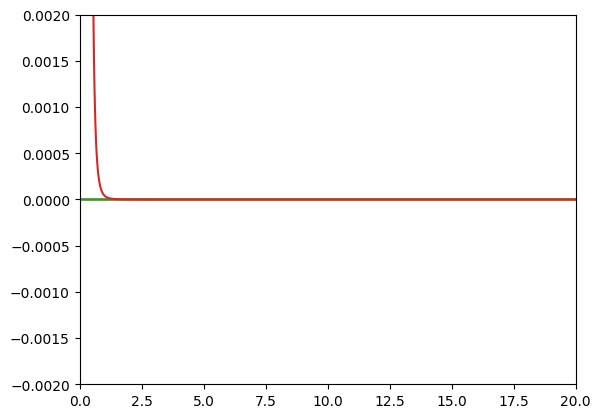

: 

In [81]:


# define a function to compute the wavefunction for a given energy
def compute_wavefunction(En,R,l):
    Rb=R[::-1]
    du0=-1e-5
    ub=integrate.odeint(Schroed_deriv, [0.0,du0], Rb, args=(l,En))
    ur=ub[:,0][::-1]
    norm=integrate.simps(ur**2,x=R)
    ur *= 1./np.sqrt(norm)
    ur = ur/R**l
    return ur

# define the range of energies to search and the radial coordinate array
Esearch = -1.2/arange(1,20,0.2)**2
R = np.logspace(-5, 2.2, 500)

# set the quantum number l
l = 7
def GraphBoundStates(R,l,nmax,Esearch):
    n=0
    plt.figure()
    Ebnd=[]
    # initialize the value of the wavefunction at R=0 for the first energy
    u0 = shoot(Esearch[0],R,l)

    for i in range(1,len(Esearch)):
        # compute the value of the wavefunction at R=0 for the current energy
        u1 = shoot(Esearch[i],R,l)
        if u0*u1<0:
            Ebound = optimize.brentq(shoot,Esearch[i-1],Esearch[i],xtol=1e-16,args=(R,l))
            Ebnd.append((l,Ebound))
            if len(Ebnd)>nmax: break
            n+=1
            print ('Found bound state at E=%14.9f E_exact=%14.9f l=%d' % (Ebound, -1.0/(n+l)**2,l))
            # recompute the wavefunction for the found energy
            ur = compute_wavefunction(Ebound, R, l)

            # plot the wavefunction
            plt.plot(R, ur, label='E = %14.9f' % Ebound)
            plt.xlim(0, 20)
            plt.ylim(-.002, .002)
        u0=u1
    
    return Ebnd


GraphBoundStates(R,l,7,Esearch)